In [1]:
import numpy as np
import pandas as pd

busdata = np.loadtxt('../cpp/sim_results_new/sim_results_C2_1_3_2_2_2_2_3_1_88_88_58_58_58_58_88_88_10000000_1000000_50000_1000_50_anim.txt')
columns = ['time', 'x', 'y', 'speed', 'gapf', 'gapfl', 'gapbl', 'vbef', 'nextstopx', 'nextStID', 'nextStEnd', 'acc', 'lineID', 'laststop', 'stoptime', 'dwelltime', 'nextStindex', 'occupation', 'id', 'init_time']



In [2]:
df = pd.DataFrame(busdata, columns = columns)

In [3]:
df['lineID'].unique()

array([0., 3., 6., 8., 2., 1., 4., 5., 7.])

<AxesSubplot: xlabel='time', ylabel='occupation'>

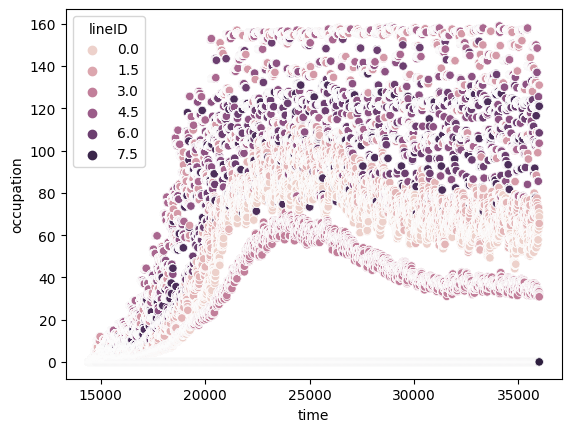

In [4]:
import seaborn as sns
occ_df = df.groupby(['time','lineID'])['occupation'].mean().reset_index()

sns.scatterplot(data = occ_df, x = 'time', y='occupation', hue = 'lineID')

In [5]:
occ_df['occupation'].max()

159.0

In [3]:
import numpy as np
from vpython import*
from PIL import ImageGrab
scene = canvas() # This is needed in Jupyter notebook and lab to make programs easily rerunnable

    
    
Db = 10
Dy = 3
DS = 235
Nw = 3
Ds = 30
Dw = 15
gap=(DS-(Nw-1)*Ds-Dw)/2.0
NStations = 46
Ocmax = 160

ycenter = 15*DS+gap
scene.width = 800
scene.height = 400
scene.range = 100
scene.center = vector(ycenter,0,0)
scene.background = color.green
scene.ambient = color.gray(0.4)
scene.forward = vector(1,1,-1)
scene.up = vector(0,1,0)



stationElements = []

for i in range(NStations):
    x = gap + i*DS
    posst=vector(x+0.5*DS,-11,-1)
    stationElements.append(box(pos=posst, length=DS, width=1,height=5, color=color.gray(0.8) ))
    posst=vector(x+0.5*DS,11,-1)
    stationElements.append(box(pos=posst, length=DS, width=1,height=5, color=color.gray(0.8) ))
    for j in range(Nw):
        posv=vector(x+0.5*Dw+j*(Ds),0,0)
        stationElements.append(box(pos=posv, length=Dw, width=10,height=10, color=color.blue))
        posst=vector(x+Dw+j*(Ds),-8,-1)
        stationElements.append(box(pos=posst, length=3*Dw, width=1,height=10, color=color.gray(0.8) ))
        posst=vector(x+Dw+j*(Ds),8,-1)
        stationElements.append(box(pos=posst, length=3*Dw, width=1,height=10, color=color.gray(0.8) ))
        if j+1<Nw:
            posv=vector(x+Dw+0.5*(Ds-Dw)+j*(Ds),0,0)
            stationElements.append(box(pos=posv, length=Dw, width=1,height=6, color=color.blue))
        if j==0:
            posst=vector(x-0.5*Dw,-8,-1)
            stationElements.append(box(pos=posst, length=Dw, width=1,height=10, color=color.gray(0.8)))
            posst=vector(x-0.5*Dw,8,-1)
            stationElements.append(box(pos=posst, length=Dw, width=1,height=10, color=color.gray(0.8)))

buses = []
for time in range(23000,25000):
    rate(50)
    for bus in buses:
        bus.visible = False
    del buses
        
    mask = busdata[:,0]==time
    buses = []
    for bus in busdata[mask]:
        x = bus[1]
        y = bus[2]
        acc = bus[11]
        occ = bus[17]
        posbus = vector(x-0.5*Db*acc/abs(acc),2*(2*y-5)*acc-0.5*Dy*acc/abs(acc),0)
        buses.append(box(pos=posbus, length=0.95*Db, height=Dy, width=4, color=vector((1-0.5*occ/Ocmax),0.2,0.2)))
        

<IPython.core.display.Javascript object>